<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller:  Genetic Algorithms**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)
4. [Ejercicio 4.](#eje4)
5. [Ejercicio 5.](#eje5)

In [1]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20221-H1" #@param {type:"string"}
assignment_id = group_id +'.taller_algogeneticos'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
""" 

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [5]:
#@title **Import libraries**

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Existe una serie de problemas computacionales un poco más dificiles que los poblemas NP, es decir, problemas cuya solución se puede alcanzar en un tiempo polinomial. A estos problemas difíciles se les conoce como problemas **NP-completos** y hoy trabajaremos en uno de ellos a pesar que se vea tan poco complejo!

El objetivo de este taller es organizar los examenes de escuela de la universidad. Para esto imagine que tiene una lista con las asignaturas que tendrán examen de escuela y los estudiantes que están matriculados en cada una de estas asignaturas (Puede haber un estudiante que esté matriculado en varias asignaturas). Cuál es el número mínimo de franjas horarias que se deben habilitar para asegurar que no hay dos asignaturas organizadas en la misma franja horaria con un estudiante en común?

Vamos a implementar un Algoritmo genético que resuelva este problema.

Para esto, nos ayudaremos de matrices de organización. En ellas:<br><br>

$$
M_{i,j} = 
     \begin{cases}
       1  &\quad \text{SI } i\neq j \text{, Y existe al menos un estudiante en }j \text{ e }i  \\
       0 &\quad\text{SI } i\neq j \text{, Y no existe un estudiante en }j \text{ e }i \\
       0 &\quad\text{SI } i=j\\
     \end{cases}
$$
<br>
Por ejemplo, suponga que se tienen tres asignaturas: Asignatura 1, Asignatura 2, y Asignatura 3. Ahora suponga que la lista de estudiantes de cada asignatura es la siguiente:

Asignatura 1: Alberto, Bruna, Carlos, y Daniel.

Asignatura 2: Alberto, Bruna, Carlos, Eduardo, Federico y Gabriela.

Asignatura 3: Eduardo, Federico, Ximena y Laura. 

De acá observamos que las Asignaturas 1 y 2 comparten 3 estudiantes por tanto $M_{1,2} = 1$ y $M_{2,1}=1$. Las asignaturas 1 y 3 no comparten ningún estudiante, por tanto $M_{1,3} = 0$ y $M_{3,1} = 0$. Por último, las asignaturas 2 y 3 comparten 2 estudiantes, por tanto $M_{2,3} = 1$ y $M_{3,2} = 1$. 

A partir del análisis anterios, la matriz de organización de este ejemplo sería la siguiente:

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/matriz_organizacion.png" width="400px" />

<!-- $ \begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0 
\end{bmatrix}  $ -->



---
# **Ejercicio 1 (Org. Matrix)**  <a name="eje1"></a>
---

Cree una función que cree una matriz de organización aleatoria para el caso de ``N`` asignaturas.

La función recibe un entero positivo `N` y retorna un `numpy.array()` de la lista con $N$ listas de longitud $N$.

Por ejemplo, para $N=3$ se debe obtener una salida similar al siguiente resultado:

`array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])`

In [7]:
#@title **code student**
def function_create_org_matrix(N, random_state=21):
    import numpy as np
    import random
    random.seed(random_state)
    #Your Code Here
    
    return None

In [38]:
function_create_org_matrix(N = 3)

array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_create_org_matrix)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

---
# **Ejercicio 2 (Init. Population)**  <a name="eje2"></a>
---

Para un problema con $N$ asignaturas nuestros individuos serán listas 
$[c_1,c_2,...,c_N]$ (de longitud $N$), donde $1\leq c_i \leq K$, siendo $c_i$ el número de la franja horaria asignado a la asignatura $i$, siendo $K$ el número de franjas horarias en las que deseamos organizar. Por ejemplo suponiendo $K=3$, tenemos 3 posibles franjas horarias, un posible individuo en este caso es [1,1,3,2] que indica que las asignaturas 1, 2, 3 y 4 estarán en la franja 1, 1, 3, y 2 respectivamente.

Desarrolle una función que cree una población.

La función recibe como argumentos el numero de individuos (`pob_size`), la longitud de cada individuo (`N`) y el número de franjas horarias (`K`).

Los valores de cada individuo deben ser números enteros positivos aleatorios.

La función debe **retornar** un `numpy.array()` de la lista de individuos.

In [ ]:
#@title **code student**
#@markdown No modifique las dos últimas lineas

def function_init_population(pob_size, N, K, random_state=21):
    import numpy as np
    import random
    random.seed(random_state)
    
    #Your Code Here
        
    return None

In [40]:
function_init_population(pob_size=5, N=4, K=3)

array([[1, 2, 3, 2],
       [3, 2, 2, 1],
       [2, 3, 1, 3],
       [3, 1, 1, 1],
       [2, 3, 2, 1]])

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_init_population)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

---
# **Ejercicio 3 (Cost)**  <a name="eje3"></a>
---

Ahora vamos a crear nuestra función de costo. Para una individuo particular de nuestra población, su costo viene dado por:

$Costo(  [𝑐_1,𝑐_2,...,𝑐_𝑁]) = \sum_{i=1}^N \sum_{j=i}^N \sigma(i,j)$

donde:

$$
\sigma(i,j) = 
     \begin{cases}
       1  &\quad \text{SI }c_i = c_j \text{, Y } M_{i,j} = 1  \\
       0 &\quad\text{caso contrario} 
     \end{cases}
$$

En otras palabras, si la solución asigna dos asignaturas a la misma franja horaria ($c_i = c_j$) y ademas estas comparten estudiante ($M_{i,j} = 1$) el costo aumenta en una unidad.

Construya una función que reciba la matriz de organización y un individuo, y **devuelva** el costo.

In [ ]:
#@title **code student**
def function_cost(M,individuo):
    
    #Your Code Here
    
    return None

In [42]:
N = 20
M = function_create_org_matrix(N=N)
indv = function_init_population(pob_size=5, N=N, K=3)[0]
print(M)
print(indv)
cost = function_cost(M = M,individuo = indv)
print(f"Cost: {cost}")

[[0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1]
 [1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1]
 [1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0]
 [0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1]
 [0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1]
 [1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0]
 [1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0]
 [0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0]
 [0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1]
 [0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1]
 [0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1]
 [1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1]
 [1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0]]
[1 2 3 2 3 2 2 1 2 3 1 3 3 1 1 1 2 3 2 1]
Cost: 27


In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_cost)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

# **Ejercicio 4 (Crossover)**  <a name="eje4"></a>


Para terminar, tenemos que crear nuestra función de cruce (Crossover). Para ello tomaremos a dos individuos y seleccionaremos de forma aleatoria un punto de corte. 

Este punto es una posición, a partir de la cual se intercambian las franjas horarias de los dos individuos, dando así origen a 2 nuevos individuos. Por ejemplo, la mutación resultante de dos individuos:

$a = [1,2,1,2,3,3,4]$ &nbsp;&nbsp;&nbsp; y &nbsp;&nbsp;&nbsp; $b = [4,4,1,1,2,3,2]$ 

con punto de corte aleatorio en la posición $2$ es:

$hijo_1 = [1,2,1,1,2,3,2]$ &nbsp;&nbsp; e &nbsp;&nbsp; $hijo_2 = [4,4,1,2,3,3,4]$.


Vamos a crear ahora una función para que dados dos individuos `individuo1` e `individuo2`, **devuelva** dos nuevos individuos (listas) `new1`, `new2`.


In [ ]:
#@title **code student**
def function_crossover(individuo1, individuo2, random_state=21):    
    import random
    random.seed(random_state)
    #Your Code Here.
    
    return None

In [43]:
indv1, indv2 = function_init_population(pob_size=5, N=20, K=3)[0:2]

function_crossover(individuo1=indv1, individuo2=indv2)

([1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 1, 3, 2, 1, 1],
 [1, 1, 1, 3, 1, 2, 2, 1, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3, 2, 1])

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_crossover)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

# **Ejercicio 5 (Mutation)** <a name="eje5"></a>

Para terminar, tenemos que crear nuestra función de mutacion. Para ello crearemos una función que tome a un individuo y dada una probabilidad de mutación le aplique los siguientes cambios:

1) Seleccionar una posición $r$ aleatoria en el indivuduo.

2) Asignar una nueva franja aleatoria en esta posición, es decir, un número entero aleatorios en el rango $[1,K]$.

La función debe recibir como entrada el individuo (`individuo`), el número de posibles franjas horarias `K`, y una probabilidad de mutación (`mutation_prob`). La función debe **devolver** simplemente un nuevo individuo (i.e una lista).



In [ ]:
#@title **code student**
def func_mutation(individuo, K, mutation_prob, random_state=21):    
    import random
    random.seed(random_state)
    #Your Code Here.
    
    return None

In [44]:
indv = function_init_population(pob_size=5, N=20, K=3)[0]
func_mutation(individuo=indv, K=5, mutation_prob=0.2)

array([1, 2, 3, 2, 3, 2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 2, 3, 2, 1])

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(func_mutation)
r = check_solution_and_evaluate(assignment_id, student_func_str) 

# **A simular!**

Es hora de probar nuestro algoritmo para calcular el mínimo de franjas horarias. Para esto empezaremos con un valor de $K$ alto e iremos reduciendo su valor hasta encontrar el mínimo.

In [35]:
#@title **Ejecute este código** <br>Por favor no borrar

def get_df_franja(best_indv,num_asignaturas):
  df_info_asignaturas = pd.DataFrame(columns={"Asignatura","Franja_horaria"})      
  df_info_asignaturas["Asignatura"] = [f"Asignatura {i}" for i in range(1,num_asignaturas+1)]
  df_info_asignaturas["Franja_horaria"] = best_indv 
  return df_info_asignaturas

def plot_evolution(gen_idx,costs,num_franjas = None):
  plt.plot(gen_idx,costs)
  if num_franjas is not None: plt.title(f"Num Franjas Horarias {num_franjas}")
  plt.xlabel("Generation")
  plt.ylabel("Cost")
  plt.show()

def function_selection(population,cost_func,org_matrix):
  import random

  #costo total
  total_cost = 0
  for individual in population:
      total_cost += 1/(1+cost_func(org_matrix, individual))
  
  # cumulative cost sum es una distribucion normal del peso de cada costo,
  # i.e para el. individuo i, su costo es 1/1+c_i. Y su probabilidad dado ese costo
  # es cumulative_cost[i]. A esto se llama "Fitness proportionate selection".
  cumulative_cost = []
  cumulative_cost_sum = 0
  for i in range(len(population)):
      cumulative_cost_sum += (1 / (1+cost_func(org_matrix, population[i])))/total_cost
      cumulative_cost.append(cumulative_cost_sum)
  
  # De forma aleatoria se eligirán individuos con una probabilidad random.
  new_population = []  
  for i in range(len(population)):
      roulette = random.uniform(0, 1)
      for j in range(len(population)):
          if (roulette <= cumulative_cost[j]):
              new_population.append(population[j])
              break
  return new_population  

def run_ga(num_asignaturas,
           pob_size,
           create_org_matrix_func,
           init_pob_func,
           crossover_func,
           mutation_func,
           cost_func,
          #  crossover_prob,
           mutation_prob,
           n_iters):  
  org_matrix = create_org_matrix_func(num_asignaturas) #Se crea matriz ede organizacion
  print(f"Para {num_asignaturas} asignaturas, tenemos la matriz de organizacion:\n\n{np.array(org_matrix)}"), 

  # Se crea el numero maximo de asignaturas que se podrian cruzar en la misma franja
  
  # max_num_franjas_cruzadas = 1
  # for i in range(num_asignaturas):
  #     if sum(org_matrix[i]) > max_num_franjas_cruzadas:
  #         max_num_franjas_cruzadas = sum(org_matrix[i]) + 1

  max_num_franjas_cruzadas = num_asignaturas
  for num_franjas in range(max_num_franjas_cruzadas,0,-1):
    print("-"*10 + f"Using {num_franjas} franjas" + "-"*10)
    population = init_pob_func(pob_size,num_asignaturas,num_franjas)
    gen_idx, costs = [], []
    for generation in range(1,n_iters+1):
      
      #Best population    
      population = function_selection(population = population,
                                      cost_func = cost_func,
                                      org_matrix = org_matrix)
      #crossover
      new_population = []
      random.shuffle(population)
      for i in range(0, pob_size-1, 2):
          child1, child2 = crossover_func(population[i], population[i+1], random_state = generation)
          new_population.append(child1)
          new_population.append(child2)

      #Mutation
      for i in range(len(new_population)):
        if generation < 400:
          new_population[i] = mutation_func(individuo = new_population[i], 
                                            K = num_franjas, 
                                            mutation_prob = 0.5,
                                            random_state = generation)
        else:
          new_population[i] = mutation_func(individuo = new_population[i], 
                                            K = num_franjas, 
                                            mutation_prob = mutation_prob,
                                            random_state = generation)      
      #Best Cost
      population = new_population
      cost_best_indv_franja = cost_func(org_matrix,population[0])
      best_indv_franja = population[0]
      # print(f"GEN {generation} Cost: {cost_best_indv_franja}. Best indv: {best_indv_franja}")
      
      if cost_best_indv_franja == 0:
        # display(get_df_franja(best_indv_franja,num_asignaturas))
        cost_best_indv = cost_best_indv_franja
        best_indv = best_indv_franja
        gen_idx.append(generation-1)
        costs.append(cost_best_indv)                
        break
      else:
        for individual in population:
            cost_indv = cost_func(org_matrix, individual)
            if cost_indv < cost_best_indv_franja:
                cost_best_indv_franja = cost_indv
                best_indv_franja = individual
                # print(f"New!! Cost: {cost_best_indv}. Best indv: {best_indv}")
        if generation % 50 ==0:
          print(f"\nGeneration {generation} | Best Cost: {cost_best_indv_franja} | Indv: {best_indv_franja}")    
      
      if cost_best_indv_franja == 0: #Si luego de comparar con otros individuos se encontró uno de coste cero
        # display(get_df_franja(best_indv_franja,num_asignaturas))
        cost_best_indv = cost_best_indv_franja
        best_indv = best_indv_franja
        gen_idx.append(generation-1)
        costs.append(cost_best_indv)        
        if gen_idx[-1] >=10:
          plot_evolution(gen_idx,costs,num_franjas)
        break
      else:
        # print(f"No zero after comparison --> GEN {generation} Cost: {cost_best_indv_franja}. Best indv: {best_indv_franja}")
        gen_idx.append(generation)
        costs.append(cost_best_indv_franja)
        if generation == n_iters:
          print("Can't find zero cost solution")
          try: df_info_asignaturas = get_df_franja(best_indv,num_asignaturas)
          except: df_info_asignaturas = get_df_franja(best_indv_franja,num_asignaturas) 
          solution = len(df_info_asignaturas["Franja_horaria"].unique())
          # print(f"\n\n ---> Como mínimo se necesitan {solution} franjas horarias")
          # print(gen_idx,costs)
          plot_evolution(gen_idx,costs,num_franjas)
          return np.array(org_matrix), best_indv,gen_idx,costs, df_info_asignaturas, solution
      # print(costs)
    gen_idx, costs = [], []
    
  

Para 10 asignaturas, tenemos la matriz de organizacion:

[[0 1 1 1 1 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 1]
 [1 1 0 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 1]
 [1 0 0 1 0 0 1 1 0 1]
 [0 0 1 1 0 0 1 1 1 1]
 [1 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 1]
 [0 1 0 1 1 1 0 0 1 0]]
----------Using 10 franjas----------
----------Using 9 franjas----------
----------Using 8 franjas----------
----------Using 7 franjas----------
----------Using 6 franjas----------
----------Using 5 franjas----------
----------Using 4 franjas----------
----------Using 3 franjas----------

Generation 50 | Best Cost: 8 | Indv: [2, 2, 2, 1, 2, 2, 1, 2, 3, 3]

Generation 100 | Best Cost: 8 | Indv: [2, 2, 3, 3, 3, 1, 1, 1, 3, 3]

Generation 150 | Best Cost: 7 | Indv: [3, 2, 1, 3, 2, 1, 2, 1, 1, 2]

Generation 200 | Best Cost: 5 | Indv: [2, 2, 1, 3, 1, 2, 2, 1, 3, 1]

Generation 250 | Best Cost: 7 | Indv: [2, 2, 3, 1, 3, 1, 1, 1, 1, 2]

Generation 300 | Best Cost: 7 | Indv: [2, 1, 3, 1, 2, 3, 3, 1, 1, 1]

Gen

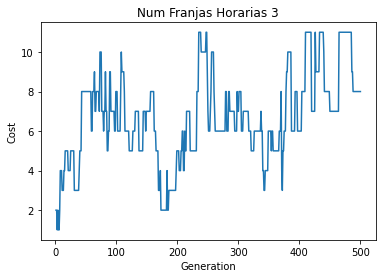

In [36]:
org_matrix, best_indv,gen_idx,costs_last_franja, df_info_asignaturas, solution = run_ga(num_asignaturas = 10,
                                                        pob_size = 200,
                                                        create_org_matrix_func = function_create_org_matrix,
                                                        init_pob_func = function_init_population,
                                                        crossover_func = function_crossover,
                                                        mutation_func = func_mutation,
                                                        cost_func = function_cost,                                                        
                                                        mutation_prob = 0.2,
                                                        n_iters = 500)


In [37]:
print(f"Para las asignaturas con la matriz de condición:\n {org_matrix}")
print(f"\nCheck if the answer has cost zero: {function_cost(org_matrix,best_indv)}")
print(f"\n\n ---> Se necesitan como mínimo {solution} franjas horarias")
display(df_info_asignaturas)


Para las asignaturas con la matriz de condición:
 [[0 1 1 1 1 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 1]
 [1 1 0 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 0 0 1]
 [1 0 0 1 0 0 1 1 0 1]
 [0 0 1 1 0 0 1 1 1 1]
 [1 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 0 1 1 0 0 1]
 [0 1 0 1 1 1 0 0 1 0]]

Check if the answer has cost zero: 0


 ---> Se necesitan como mínimo 4 franjas horarias


Asignatura  Franja_horaria
0   Asignatura 1               1
1   Asignatura 2               3
2   Asignatura 3               2
3   Asignatura 4               3
4   Asignatura 5               4
5   Asignatura 6               4
6   Asignatura 7               3
7   Asignatura 8               1
8   Asignatura 9               2
9  Asignatura 10               1

# References:
[1] [Genetic algorithm Graph Coloring](https://www.geeksforgeeks.org/project-idea-genetic-algorithms-for-graph-colouring/)

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>